In [2]:
library(wooldridge)
library(stargazer)
library(knitr)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [7]:
pacman::p_load(wooldridge,stargazer,broom,tidyverse,ggplot2,
               dplyr,tidyr,moderndive,jtools,sjPlot,dotwhisker,FSA,
               car,QuantPsyc,
              dynlm)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)

dynlm installed


# Example 11.7: Wages and Productivity
$$\widehat{log(hrwage_t)} = \beta_0 + \beta_1log(outphr_t) + \beta_2t + \mu_t$$ Data from the Economic Report of the President, 1989, Table B-47. The data are for the non-farm business sector.

In [2]:
data("earns")

wage_time <- lm(lhrwage ~ loutphr + t, data = earns)
wage_diff <- lm(diff(lhrwage) ~ diff(loutphr), data = earns)
stargazer(type = "text",wage_time, wage_diff,  single.row = TRUE, header = FALSE, digits=5)


                                             Dependent variable:                
                              --------------------------------------------------
                                       lhrwage               diff(lhrwage)      
                                         (1)                      (2)           
--------------------------------------------------------------------------------
loutphr                         1.63964*** (0.09335)                            
t                               -0.01823*** (0.00175)                           
diff(loutphr)                                             0.80932*** (0.17345)  
Constant                        -5.32845*** (0.37445)      -0.00366 (0.00422)   
--------------------------------------------------------------------------------
Observations                             41                        40           
R2                                     0.97122                  0.36424         
Adjusted R2                

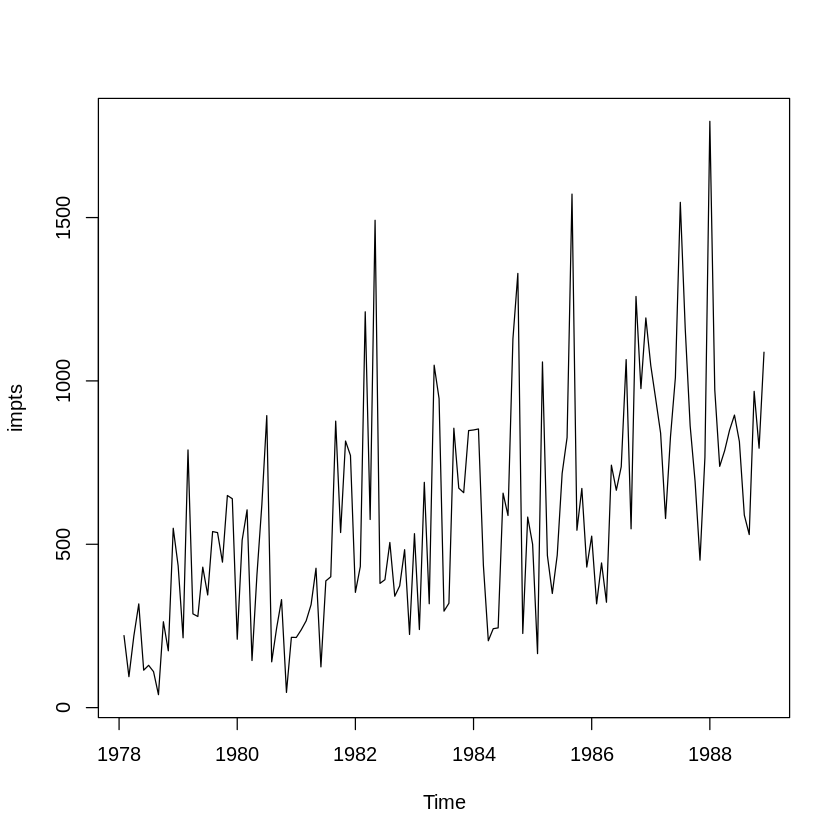

In [4]:
data(barium, package='wooldridge')

# Imports from China: Variable "chnimp" from data frame "data"
# Monthly time series starting Feb. 1978
impts <- ts(barium$chnimp, start=c(1978,2), frequency=12)

# plot time series
plot(impts)

Loading required package: xts

Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "F"

           F.Open F.High F.Low F.Close F.Volume F.Adjusted
2007-01-03   7.56   7.67  7.44    7.51 78652200   5.247986
2007-01-04   7.56   7.72  7.43    7.70 63454900   5.380758
2007-01-05   7.72   7.75  7.57    7.62 40562100   5.324853
2007-01-08   7.63   7.75  7.62    7.73 48938500   5.401723
2007-01-09   7.75   7.86  7.73    7.79 56732200   5.443650
2007-01-10   7.79   7.79  7.67    7.73 42397100   5.401723

           F.Open F.High F.Low F.Close F.Volume F.Adjusted
2019-06-25   9.97   9.99  9.83    9.84 28682000       9.84
2019-06-26   9.87   9.96  9.82    9.91 33739100       9.91
2019-06-27  10.04  10.24 10.00   10.20 42954600      10.20
2019-06-28  10.20  10.31 10.20   10.23 37551600      10.23
2019-07-01  10.34  10.43 10.07   10.15 38452600      10.15
2019-07-02  10.15  10.21 10.04   10.12 29708000      10.12

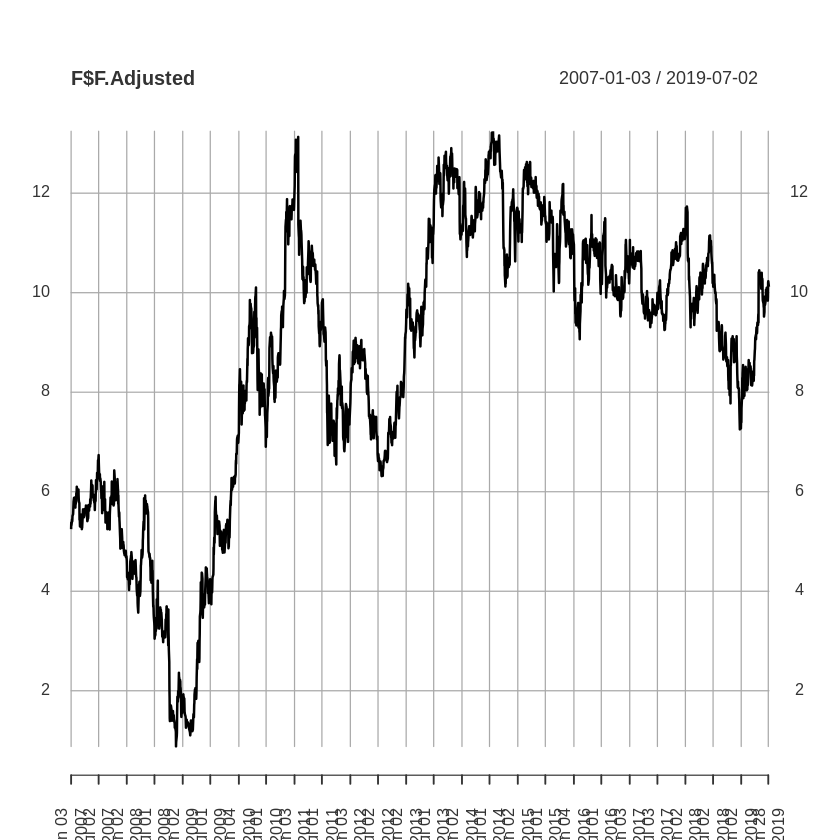

In [5]:
library(quantmod)
# Which Yahoo Finance symbols? 
# See http://finance.yahoo.com/lookup:
# "F" = Ford Motor Company

# Download data
getSymbols("F", auto.assign=TRUE)

# first and last 6 rows of resulting data frame:
head(F)
tail(F)

# Time series plot of adjusted closing prices:
plot(F$F.Adjusted, las=2)

[1] 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
[16] 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
[31] 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
[46] 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



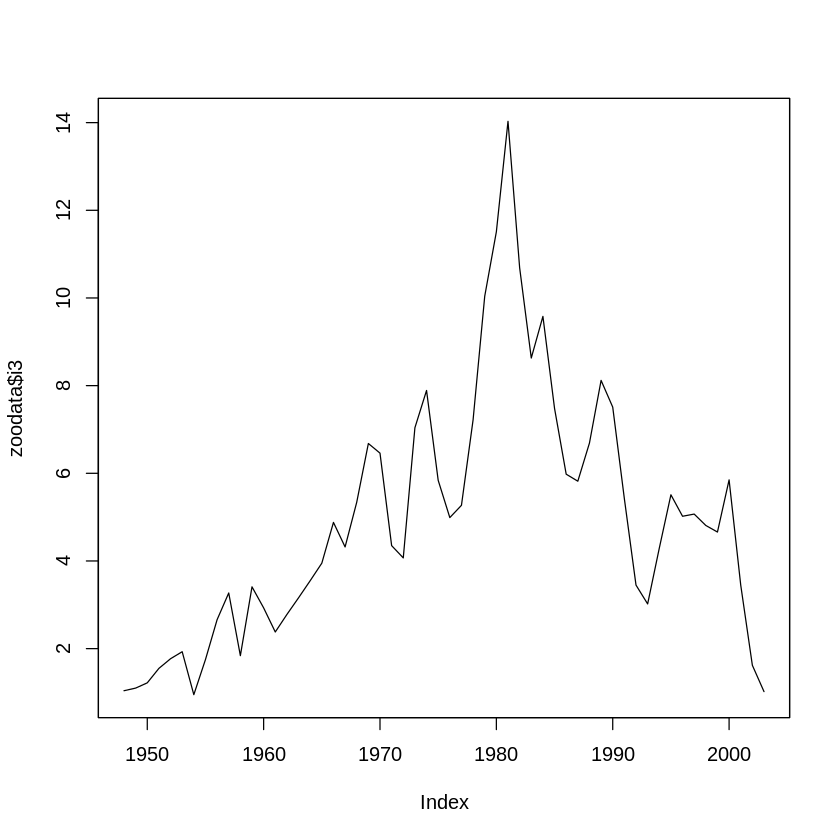

In [3]:
data(intdef, package='wooldridge')

# Variable "year" as the time measure:
intdef$year

# define "zoo" object containing all data, time measure=year:
library(zoo)
zoodata <- zoo(intdef, order.by=intdef$year)

# Time series plot of inflation
plot(zoodata$i3)

In [9]:
library(dynlm);library(stargazer)
data(nyse, package='wooldridge')

# Define time series (numbered 1,...,n)
tsdata <- ts(nyse)

# Linear regression of models with lags:
reg1 <- dynlm(return~L(return)                        , data=tsdata) 
reg2 <- dynlm(return~L(return)+L(return,2)            , data=tsdata) 
reg3 <- dynlm(return~L(return)+L(return,2)+L(return,3), data=tsdata) 

# Pretty regression table
stargazer(reg1, reg2, reg3, type="text",
                            keep.stat=c("n","rsq","adj.rsq","f"))


                                 Dependent variable:                    
             -----------------------------------------------------------
                                       return                           
                     (1)                 (2)                 (3)        
------------------------------------------------------------------------
L(return)           0.059               0.060               0.061       
                   (0.038)             (0.038)             (0.038)      
                                                                        
L(return, 2)                           -0.038              -0.040       
                                       (0.038)             (0.038)      
                                                                        
L(return, 3)                                                0.031       
                                                           (0.038)      
                                                  

In [8]:
# Libraries for dynamic lm and "stargazer" regression table 
library(dynlm);library(stargazer)
data(fertil3, package='wooldridge')

# Define Yearly time series beginning in 1913
tsdata <- ts(fertil3, start=1913)

# Linear regression of model with first differences:
res1 <- dynlm( d(gfr) ~ d(pe), data=tsdata)

# Linear regression of model with lagged differences:
res2 <- dynlm( d(gfr) ~ d(pe) + L(d(pe)) + L(d(pe),2), data=tsdata)

# Pretty regression table
stargazer(res1,res2,type="text")


                              Dependent variable:           
                    ----------------------------------------
                                     d(gfr)                 
                           (1)                  (2)         
------------------------------------------------------------
d(pe)                     -0.043              -0.036        
                         (0.028)              (0.027)       
                                                            
L(d(pe))                                      -0.014        
                                              (0.028)       
                                                            
L(d(pe), 2)                                  0.110***       
                                              (0.027)       
                                                            
Constant                  -0.785             -0.964**       
                         (0.502)              (0.468)       
                       

[1] "AAPL"


                                  Dependent variable:                      
             --------------------------------------------------------------
                                          ret                              
                     (1)                  (2)                  (3)         
---------------------------------------------------------------------------
L(ret)              -0.003               -0.004               -0.003       
                   (0.021)              (0.021)              (0.021)       
                                                                           
L(ret, 2)                                -0.029               -0.030       
                                        (0.021)              (0.021)       
                                                                           
L(ret, 3)                                                     0.005        
                                                             (0.021)       
           

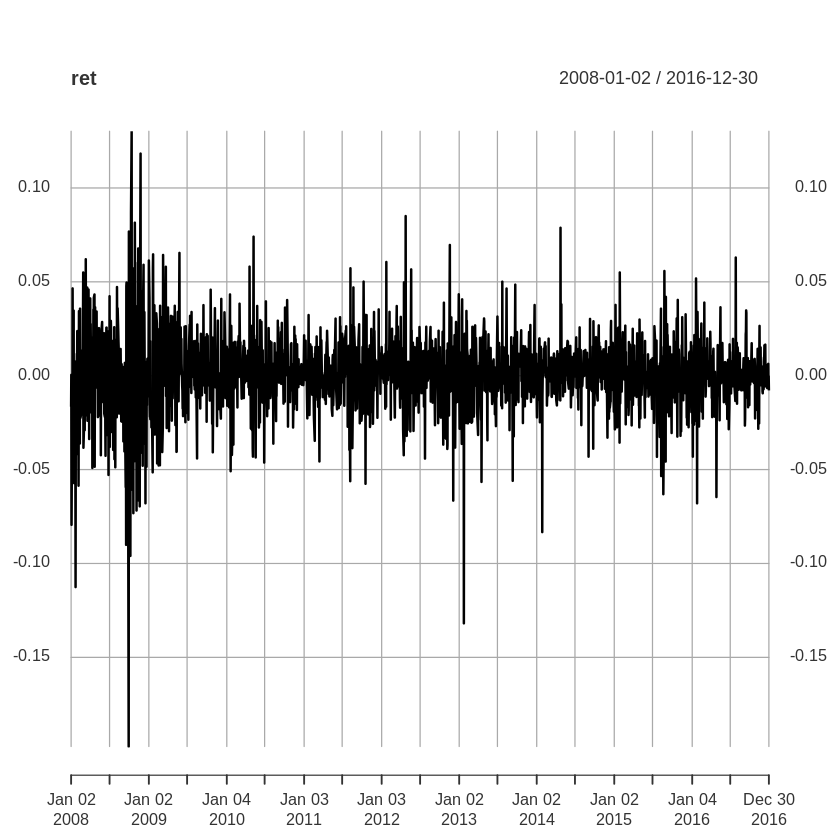

In [10]:
library(zoo);library(quantmod);library(dynlm);library(stargazer)

# Download data using the quantmod package:
getSymbols("AAPL", auto.assign = TRUE)

# Calculate return as the log difference
ret <- diff( log(AAPL$AAPL.Adjusted) )
# Subset 2008-2016 by special xts indexing:
ret <- ret["2008/2016"]

# Plot returns
plot(ret)

# Linear regression of models with lags:
ret <- as.zoo(ret)  # dynlm cannot handle xts objects
reg1 <- dynlm(ret~L(ret) ) 
reg2 <- dynlm(ret~L(ret)+L(ret,2) ) 
reg3 <- dynlm(ret~L(ret)+L(ret,2)+L(ret,3) ) 

# Pretty regression table
stargazer(reg1, reg2, reg3, type="text",
                            keep.stat=c("n","rsq","adj.rsq","f"))

In [ ]:
Chapter 11 - Further Issues in Using OLS with Time Series Data

    Example 11.1: Static Model

Dataset is not available

    Example 11.2: Finite Distributed Lag Model

Dataset is not available

    Example 11.3: AR[1] Model

Dataset is not available

    Example 11.4: Efficient Market Hypothesis

use http://fmwww.bc.edu/ec-p/data/wooldridge/nyse

summ return

    Variable |     Obs        Mean   Std. Dev.       Min        Max
-------------+-----------------------------------------------------
      return |     690    .1957843   2.114532  -15.32173   8.448762

reg return return_1

      Source |       SS       df       MS              Number of obs =     689
-------------+------------------------------           F(  1,   687) =    2.40
       Model |  10.6866237     1  10.6866237           Prob > F      =  0.1218
    Residual |  3059.73813   687   4.4537673           R-squared     =  0.0035
-------------+------------------------------           Adj R-squared =  0.0020
       Total |  3070.42476   688  4.46282668           Root MSE      =  2.1104

------------------------------------------------------------------------------
      return |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    return_1 |   .0588984   .0380231     1.55   0.122    -.0157569    .1335538
       _cons |    .179634   .0807419     2.22   0.026     .0211034    .3381646
------------------------------------------------------------------------------

    Example 11.5: Expectation Augmented Phillips Curve

use http://fmwww.bc.edu/ec-p/data/wooldridge/phillips

reg cinf unem

      Source |       SS       df       MS              Number of obs =      48
-------------+------------------------------           F(  1,    46) =    5.56
       Model |  33.3829988     1  33.3829988           Prob > F      =  0.0227
    Residual |   276.30513    46  6.00663326           R-squared     =  0.1078
-------------+------------------------------           Adj R-squared =  0.0884
       Total |  309.688129    47  6.58910913           Root MSE      =  2.4508

------------------------------------------------------------------------------
        cinf |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        unem |  -.5425869   .2301559    -2.36   0.023    -1.005867    -.079307
       _cons |   3.030581    1.37681     2.20   0.033     .2592061    5.801955
------------------------------------------------------------------------------

    Natural rate of unemployment

display _b[_cons]/-_b[unem]
5.5854288

    Example 11.6: Fertility Equation

use http://fmwww.bc.edu/ec-p/data/wooldridge/fertil3

reg gfr gfr_1

      Source |       SS       df       MS              Number of obs =      71
-------------+------------------------------           F(  1,    69) = 1413.53
       Model |   25734.824     1   25734.824           Prob > F      =  0.0000
    Residual |  1256.21904    69  18.2060731           R-squared     =  0.9535
-------------+------------------------------           Adj R-squared =  0.9528
       Total |   26991.043    70  385.586329           Root MSE      =  4.2669

------------------------------------------------------------------------------
         gfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       gfr_1 |   .9777202   .0260053    37.60   0.000      .925841    1.029599
       _cons |   1.304937   2.548821     0.51   0.610    -3.779822    6.389695
------------------------------------------------------------------------------

reg pe pe_1
	  
      Source |       SS       df       MS              Number of obs =      71
-------------+------------------------------           F(  1,    69) =  895.85
       Model |   276585.96     1   276585.96           Prob > F      =  0.0000
    Residual |  21303.1151    69  308.740798           R-squared     =  0.9285
-------------+------------------------------           Adj R-squared =  0.9274
       Total |  297889.075    70  4255.55822           Root MSE      =  17.571

------------------------------------------------------------------------------
          pe |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        pe_1 |   .9478853   .0316692    29.93   0.000     .8847069    1.011064
       _cons |   6.426196   3.808601     1.69   0.096    -1.171754    14.02415
------------------------------------------------------------------------------

reg cgfr cpe

      Source |       SS       df       MS              Number of obs =      71
-------------+------------------------------           F(  1,    69) =    2.26
       Model |  40.3237245     1  40.3237245           Prob > F      =  0.1370
    Residual |  1229.25863    69  17.8153424           R-squared     =  0.0318
-------------+------------------------------           Adj R-squared =  0.0177
       Total |  1269.58235    70  18.1368908           Root MSE      =  4.2208

------------------------------------------------------------------------------
        cgfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         cpe |  -.0426776   .0283672    -1.50   0.137    -.0992686    .0139134
       _cons |  -.7847796   .5020398    -1.56   0.123    -1.786322    .2167625
------------------------------------------------------------------------------

reg cgfr cpe cpe_1 cpe_2

      Source |       SS       df       MS              Number of obs =      69
-------------+------------------------------           F(  3,    65) =    6.56
       Model |  293.259833     3  97.7532778           Prob > F      =  0.0006
    Residual |   968.19996    65   14.895384           R-squared     =  0.2325
-------------+------------------------------           Adj R-squared =  0.1971
       Total |  1261.45979    68  18.5508793           Root MSE      =  3.8595

------------------------------------------------------------------------------
        cgfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         cpe |  -.0362021   .0267737    -1.35   0.181     -.089673    .0172687
       cpe_1 |  -.0139706    .027554    -0.51   0.614    -.0689997    .0410584
       cpe_2 |   .1099896   .0268797     4.09   0.000     .0563071    .1636721
       _cons |  -.9636787   .4677599    -2.06   0.043     -1.89786   -.0294976
------------------------------------------------------------------------------

    Example 11.7: Wages and Productivity

use http://fmwww.bc.edu/ec-p/data/wooldridge/earns

reg lhrwage loutphr t

      Source |       SS       df       MS              Number of obs =      41
-------------+------------------------------           F(  2,    38) =  641.23
       Model |  1.04458054     2  .522290269           Prob > F      =  0.0000
    Residual |  .030951697    38  .000814518           R-squared     =  0.9712
-------------+------------------------------           Adj R-squared =  0.9697
       Total |  1.07553224    40  .026888306           Root MSE      =  .02854

------------------------------------------------------------------------------
     lhrwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     loutphr |   1.639637    .093347    17.56   0.000     1.450666    1.828608
           t |  -.0182299   .0017482   -10.43   0.000     -.021769   -.0146909
       _cons |  -5.328446   .3744486   -14.23   0.000    -6.086478   -4.570415
------------------------------------------------------------------------------

reg ghrwage goutphr
	  
      Source |       SS       df       MS              Number of obs =      40
-------------+------------------------------           F(  1,    38) =   21.77
       Model |  .006255013     1  .006255013           Prob > F      =  0.0000
    Residual |  .010917977    38  .000287315           R-squared     =  0.3642
-------------+------------------------------           Adj R-squared =  0.3475
       Total |  .017172989    39  .000440333           Root MSE      =  .01695

------------------------------------------------------------------------------
     ghrwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     goutphr |   .8093157   .1734535     4.67   0.000     .4581774    1.160454
       _cons |  -.0036621     .00422    -0.87   0.391    -.0122051    .0048808
------------------------------------------------------------------------------

    Example 11.8: Fertility Equation

use http://fmwww.bc.edu/ec-p/data/wooldridge/fertil3

reg cgfr cpe cpe_1 cpe_2 cgfr_1

      Source |       SS       df       MS              Number of obs =      69
-------------+------------------------------           F(  4,    64) =    7.46
       Model |  401.286124     4  100.321531           Prob > F      =  0.0001
    Residual |   860.17367    64  13.4402136           R-squared     =  0.3181
-------------+------------------------------           Adj R-squared =  0.2755
       Total |  1261.45979    68  18.5508793           Root MSE      =  3.6661

------------------------------------------------------------------------------
        cgfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         cpe |  -.0454721   .0256417    -1.77   0.081    -.0966972     .005753
       cpe_1 |    .002064   .0267776     0.08   0.939    -.0514303    .0555584
       cpe_2 |   .1051346   .0255904     4.11   0.000      .054012    .1562572
      cgfr_1 |   .3002422   .1059034     2.84   0.006     .0886757    .5118086
       _cons |  -.7021595   .4537988    -1.55   0.127    -1.608727    .2044079
------------------------------------------------------------------------------

This page prepared by Oleksandr Talavera (revised 8 Nov 2002) 